In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
PATH = './CleanData/parallel/parallel_new/'
FREQ = 100
data_files = os.listdir(PATH)
print(data_files)
demonstrations = []
for name in data_files:
    if name.endswith('.csv'):
        demonstrations.append(pd.read_csv(PATH+name))
print(len(demonstrations))
target_length = min([len(df) for df in demonstrations])

def get_velocities(df0, time_interval = 1/FREQ):
    df = df0.copy()

    # Calculate velocity components
    df['vx'] = df['X'].diff() / time_interval
    df['vy'] = df['Y'].diff() / time_interval
    df['vz'] = df['Z'].diff() / time_interval
    dx,dy,dz = df['vx'][1], df['vy'][1], df['vz'][1]
    df['vx'].fillna(dx, inplace=True)
    df['vy'].fillna(dy, inplace=True)
    df['vz'].fillna(dz, inplace=True)
    # df['vx'] = df['vx'].dropna()
    # df['vy'].dropna()
    # df['vz'].dropna()
    df['wx'] = df['R_x'].diff() / time_interval
    df['wy'] = df['R_y'].diff() / time_interval
    df['wz'] = df['R_z'].diff() / time_interval
    dwx, dwy, dwz = df['wx'][1], df['wy'][1], df['wz'][1]
    df['wx'].fillna(dwx, inplace=True)
    df['wy'].fillna(dwy, inplace=True)
    df['wz'].fillna(dwz, inplace=True)

    return df
cols_to_keep = ['X', 'Y','Z', 'R_x','R_y','R_z',' Fx',' Fy',' Fz',' Tx',' Ty',' Tz']
min_length = min(df.shape[0] for df in demonstrations)
demos= [df[cols_to_keep][:min_length] for df in demonstrations]
demos_with_vel = [get_velocities(d) for d in demos]
X = np.array(demos_with_vel)
X.shape

['corck_parallel_iter1.csv', 'corck_parallel_iter10.csv', 'corck_parallel_iter11.csv', 'corck_parallel_iter12.csv', 'corck_parallel_iter13.csv', 'corck_parallel_iter14.csv', 'corck_parallel_iter15.csv', 'corck_parallel_iter16.csv', 'corck_parallel_iter17.csv', 'corck_parallel_iter18.csv', 'corck_parallel_iter19.csv', 'corck_parallel_iter2.csv', 'corck_parallel_iter20.csv', 'corck_parallel_iter21.csv', 'corck_parallel_iter22.csv', 'corck_parallel_iter23.csv', 'corck_parallel_iter24.csv', 'corck_parallel_iter25.csv', 'corck_parallel_iter26.csv', 'corck_parallel_iter27.csv', 'corck_parallel_iter28.csv', 'corck_parallel_iter29.csv', 'corck_parallel_iter3.csv', 'corck_parallel_iter30.csv', 'corck_parallel_iter31.csv', 'corck_parallel_iter32.csv', 'corck_parallel_iter33.csv', 'corck_parallel_iter34.csv', 'corck_parallel_iter35.csv', 'corck_parallel_iter4.csv', 'corck_parallel_iter5.csv', 'corck_parallel_iter6.csv', 'corck_parallel_iter7.csv', 'corck_parallel_iter8.csv', 'corck_parallel_iter9

C:\Users\wadda\AppData\Local\Temp\ipykernel_1064\1030605197.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vx'].fillna(dx, inplace=True)
C:\Users\wadda\AppData\Local\Temp\ipykernel_1064\1030605197.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

(96, 300, 18)

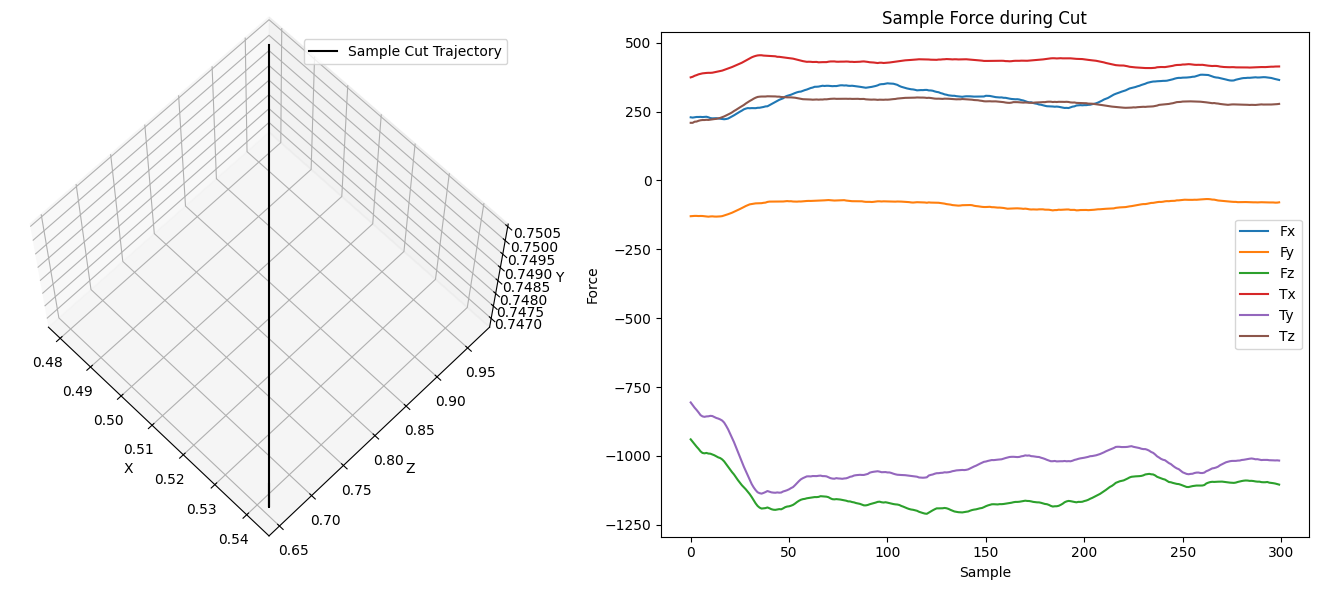

In [2]:
X_idx = 0
Y_idx = 1
Z_idx = 2
R_x_idx = 3
R_y_idx = 4
R_z_idx = 5
Fx_idx = 6
Fy_idx = 7
Fz_idx = 8
Tx_idx = 9
Ty_idx = 10
Tz_idx = 11
vx_idx = 12
vy_idx = 13
vz_idx = 14
wx_idx = 15
wy_idx = 16
wz_idx = 17

cut_index = 11  # Third cut
x, y, z, Fx, Fy, Fz = X[cut_index][:,X_idx], X[cut_index][:,Y_idx], X[cut_index][:,Z_idx], X[cut_index][:,Fx_idx], X[cut_index][:,Fy_idx], X[cut_index][:,Fz_idx]
Tx, Ty, Tz = X[cut_index][:,Tx_idx], X[cut_index][:,Ty_idx], X[cut_index][:,Tz_idx]
# Plotting trajectory
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot(x,z, y, label=f'Sample Cut Trajectory', color='k')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend()
ax.view_init(elev=65, azim=-45)

# Plotting forces
ax2 = fig.add_subplot(122)
ax2.plot(Fx, label='Fx')
ax2.plot(Fy, label='Fy')
ax2.plot(Fz, label='Fz')
ax2.plot(Tx, label='Tx')
ax2.plot(Ty, label='Ty')
ax2.plot(Tz, label='Tz')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Force')
ax2.legend()
ax2.set_title('Sample Force during Cut')

plt.tight_layout()
plt.show()


### Generating demonstrations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_parallel_lines(n_demonstrations, n_steps, start_x=0, end_x=10,start_y = 0, end_y = 1,  start_z=0, end_z=5):
    """
    Generates n demonstrations of parallel lines in the XZ plane.

    Parameters:
    - n_demonstrations: Number of parallel lines (demonstrations) to generate.
    - n_points: Number of points per line.
    - y_value: The constant Y value for all points in all lines.
    - start_x, end_x: The starting and ending X values for the lines.
    - start_z, end_z: The starting and ending Z values for the lines; varies for each demonstration to keep lines parallel.

    Returns:
    - lines: An array of shape (n_demonstrations, n_points, 3) containing the demonstrations.
    """
    lines = np.zeros((n_demonstrations, n_steps, 3))  # Each line is an array of points (x, y, z)
    x_values = np.linspace(start_x, end_x, n_steps)  # X values are the same for all lines
    y_values = np.linspace(start_y, end_y, n_steps)

    for i in range(n_demonstrations):
        z_values = np.linspace(start_z + i, end_z + i, n_steps)  # Each line has its own Z values, shifted to ensure parallelism
        lines[i, :, 0] = x_values
        lines[i, :, 1] = y_values
        lines[i, :, 2] = z_values

    return lines

def generate_line_demonstrations(n_demos, n_steps, x_range, y_range, z_range, random_state=None):
    """
    Generates n line demonstrations in the XZ plane.

    Parameters:
    - n_demos : int, number of demonstrations
    - n_steps : int, number of steps per demonstration
    - x_range : tuple, the range of x values (min, max) for the start and end points
    - z_range : tuple, the range of z values (min, max) for the start and end points
    - random_state : int, seed for reproducibility

    Returns:
    - demos : array, shape (n_demos, n_steps, 2), the generated demonstrations
    """
    rng = np.random.RandomState(random_state)
    demos = np.zeros((n_demos, n_steps, 3))  # Each demo is an array of (x, z) points

    for i in range(n_demos):
        start_x, end_x = rng.uniform(*x_range, size=2)
        start_z, end_z = rng.uniform(*z_range, size=2)
        start_y, end_y = rng.uniform(*y_range, size=2)

        x = np.linspace(start_x, end_x, n_steps)
        y = np.linspace(start_y, end_y, n_steps)
        z = np.linspace(start_z, end_z, n_steps)

        demos[i, :, 0] = x
        demos[i, :, 1] = y
        demos[i, :, 2] = z

    return demos

def plot_bayesian_gmm(bgmm, demos):
    """
    Plots the demonstrations and the Bayesian GMM components.

    Parameters:
    - bgmm : fitted BayesianGaussianMixture model
    - demos : array, shape (n_demos, n_steps, 2), the demonstrations
    """
    plt.figure(figsize=(10, 6))

    # Plot demonstrations
    for demo in demos:
        plt.plot(demo[:, 0], demo[:, 1], 'k-', alpha=0.5)

    # Plot GMM components
    x = np.linspace(demos[:, :, 0].min(), demos[:, :, 0].max(), 100)
    z = np.linspace(demos[:, :, 1].min(), demos[:, :, 1].max(), 100)
    X, Z = np.meshgrid(x, z)
    XX = np.array([X.ravel(), Z.ravel()]).T
    Y = bgmm.score_samples(XX)
    Y = Y.reshape(X.shape)

    plt.contour(X, Z, Y, levels=15, linewidths=1.5)
    plt.title('Bayesian GMM Fit to Demonstrations')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.show()



Initialization 0
  Iteration 10	 time lapse 8.64943s	 ll change 0.43771
  Iteration 20	 time lapse 10.08351s	 ll change 0.08533
  Iteration 30	 time lapse 10.38672s	 ll change 0.01215
  Iteration 40	 time lapse 10.22455s	 ll change 0.00771
  Iteration 50	 time lapse 10.46725s	 ll change 0.01969
  Iteration 60	 time lapse 10.11470s	 ll change 0.00701
  Iteration 70	 time lapse 10.36736s	 ll change 0.00207
  Iteration 80	 time lapse 10.24859s	 ll change 0.00286
  Iteration 90	 time lapse 10.35100s	 ll change 0.00452
  Iteration 100	 time lapse 10.19093s	 ll change 0.00083
  Iteration 110	 time lapse 10.35448s	 ll change 0.00065
  Iteration 120	 time lapse 10.32082s	 ll change 0.00013
  Iteration 130	 time lapse 10.21731s	 ll change 0.00043
  Iteration 140	 time lapse 10.32296s	 ll change 0.00003
Initialization converged: True	 time lapse 145.59284s	 ll -25.39854


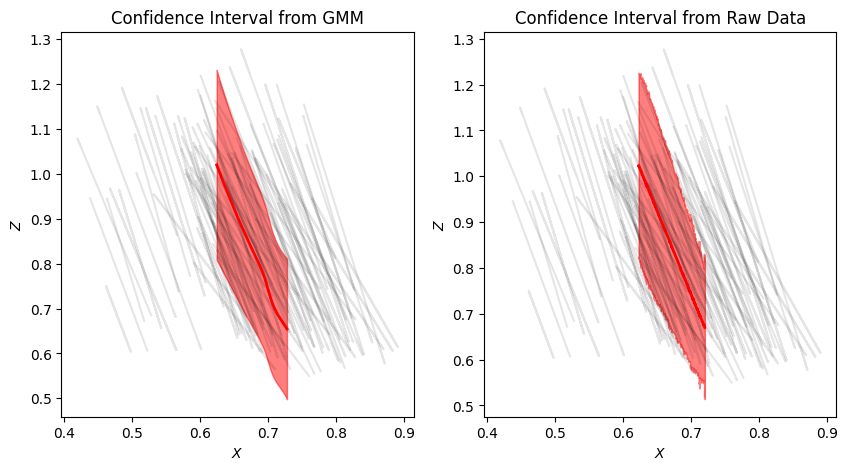

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from itertools import cycle
from gmr import GMM, kmeansplusplus_initialization, covariance_initialization
from gmr.utils import check_random_state

from bgmm_extended import BGMM
from gmm_extended import GMM_EXTENDED

random_state = check_random_state(0)
n_components = 50
tol=1e-5
max_iter = 1000
plot_covariances = False

# X = generate_parallel_lines(n_demonstrations=100, n_steps=100)
# X = generate_line_demonstrations(n_demos=100, n_steps=100, x_range=(0,10),y_range=(0,1), z_range=(0,5), random_state=0)
steps = X[:, :, 0].mean(axis=0)
expected_mean = X[:, :, 2].mean(axis=0)
expected_std = X[:, :, 2].std(axis=0)

n_demonstrations, n_steps, n_task_dims = X.shape
X_train = np.empty((n_demonstrations, n_steps, n_task_dims + 1))
X_train[:, :, 1:] = X
t = np.linspace(0, 1, n_steps)
X_train[:, :, 0] = t
X_train = X_train.reshape(n_demonstrations * n_steps, n_task_dims + 1)


initial_means = kmeansplusplus_initialization(X_train, n_components, random_state)
initial_covs = covariance_initialization(X_train, n_components)
bgmm = GMM_EXTENDED(n_components=n_components, max_iter=max_iter, verbose=2,tol=tol, init_params='k-means++').fit(X_train)
gmm = GMM(
    n_components=n_components,
    priors=bgmm.weights_,
    means=bgmm.means_,
    covariances=bgmm.covariances_,
    random_state=random_state)


# gmm = GMM(n_components=n_components, verbose=True).from_samples(X_train)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Confidence Interval from GMM")

plt.plot(X[:, :, 0].T, X[:, :, 2].T, c="k", alpha=0.1)

means_over_time = []
y_stds = []
for step in t:
    conditional_gmm = gmm.condition([0], np.array([step]))
    conditional_mvn = conditional_gmm.to_mvn()
    means_over_time.append(conditional_mvn.mean)
    y_stds.append(np.sqrt(conditional_mvn.covariance[2, 2]))
    samples = conditional_gmm.sample(100)

means_over_time = np.array(means_over_time)
y_stds = np.array(y_stds)

plt.plot(means_over_time[:, 0], means_over_time[:, 2], c="r", lw=2)
plt.fill_between(
    means_over_time[:, 0],
    means_over_time[:, 2] - 1.96 * y_stds,
    means_over_time[:, 2] + 1.96 * y_stds,
    color="r", alpha=0.5)

if plot_covariances:
    colors = cycle(["r", "g", "b"])
    for factor in np.linspace(0.5, 4.0, 8):
        new_gmm = GMM(
            n_components=len(gmm.means), priors=gmm.priors,
            means=gmm.means[:, 1:], covariances=gmm.covariances[:, 1:, 1:],
            random_state=gmm.random_state)
        for mean, (angle, width, height) in new_gmm.to_ellipses(factor):
            ell = Ellipse(xy=mean, width=width, height=height,
                            angle=np.degrees(angle))
            ell.set_alpha(0.15)
            ell.set_color(next(colors))
            plt.gca().add_artist(ell)

plt.xlabel("$X$")
plt.ylabel("$Z$")

plt.subplot(122)
plt.title("Confidence Interval from Raw Data")
plt.plot(X[:, :, 0].T, X[:, :, 2].T, c="k", alpha=0.1)

plt.plot(steps, expected_mean, c="r", lw=2)
plt.fill_between(
    steps,
    expected_mean - 1.96 * expected_std,
    expected_mean + 1.96 * expected_std,
    color="r", alpha=0.5)

plt.xlabel("$X$")
plt.ylabel("$Z$")
plt.show()

Text(0.5, 1.0, 'Covergence of gmm-gmr model on real line trajectories data')

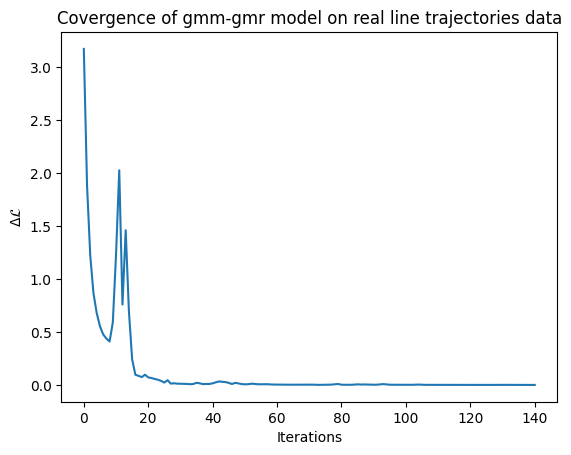

In [5]:
plt.plot(bgmm.history[2:])
plt.xlabel('Iterations')
plt.ylabel('$\Delta \mathcal{L}$')
plt.title('Covergence of gmm-gmr model on real line trajectories data')

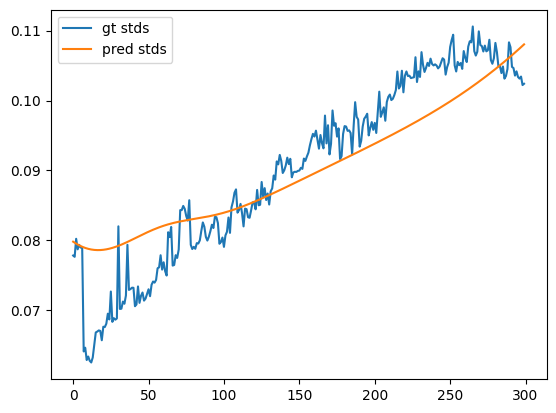

In [6]:
plt.plot(expected_std, label='gt stds')
plt.plot(y_stds, label='pred stds')
plt.legend()

In [7]:
expected_mean.shape

(300,)

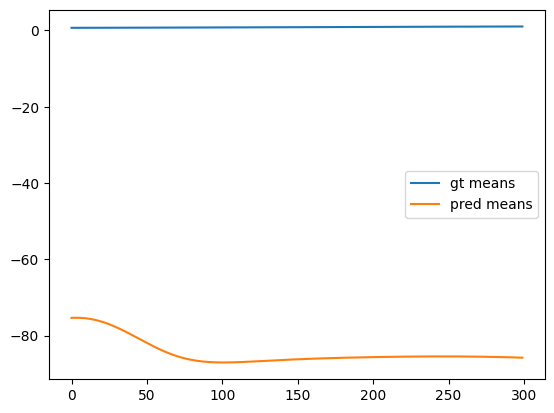

In [8]:
plt.plot(expected_mean, label='gt means')
plt.plot(np.mean(means_over_time,axis=1), label='pred means')
plt.legend()

In [9]:
# n_components = np.arange(1, 100)
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train)
#           for n in n_components]

# plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components')

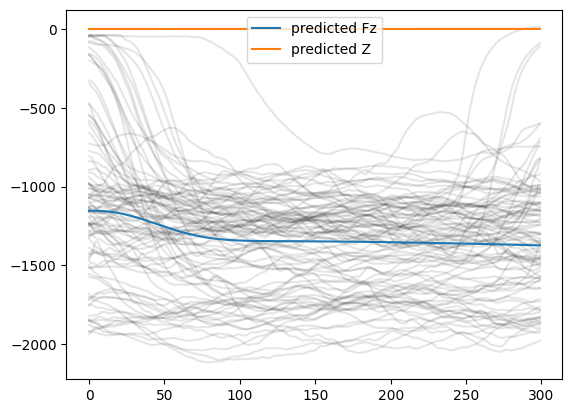

In [10]:
tr = t.reshape(-1, 1)
predictions = gmm.predict([0], tr)
# fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column
# fig.subplots_adjust(hspace=0.5)  # Adjust space between plots
# for j, (ax, (d, pred)) in enumerate(zip(axs, zip(range(n_demonstrations), ft_df[ft_vis]))):
#         fig.suptitle('Force vs trajectory')
for d in range(n_demonstrations):
    plt.plot(X[d][:,Fz_idx], c='k',alpha=0.1)
plt.plot(predictions[:,Fz_idx], label='predicted Fz')
plt.plot(predictions[:,2], label="predicted Z")
# plt.plot(X[0,:,3],label='actual')
plt.legend()

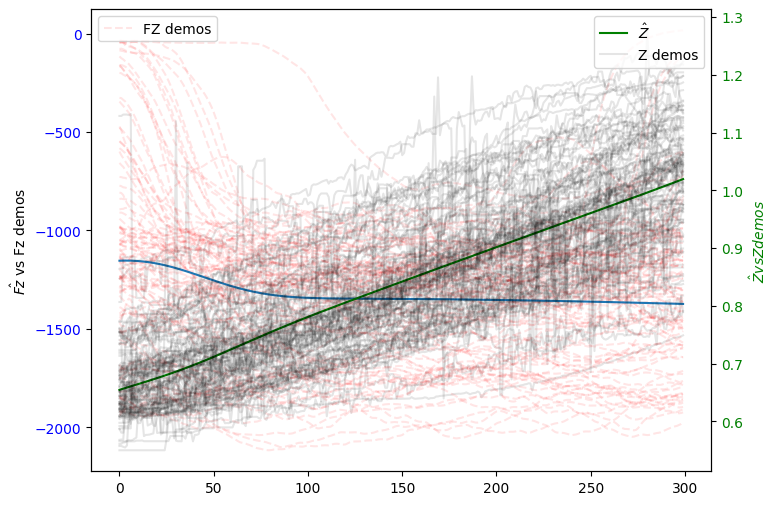

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))  # 3 rows, 1 column
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots
for i,d in enumerate(range(n_demonstrations)):
    if i==0:
        axs.plot(X[d][:,Fz_idx], linestyle='--', c='r', alpha=0.1, label='FZ demos')
    else:
        axs.plot(X[d][:,Fz_idx], linestyle='--', c='r', alpha=0.1)
# ax.plot(data_p_sync_filtered_cut[cp], color='b', label=f"Smoothed {cp}")
    # ax.set_ylabel(cp, color='b')
    axs.tick_params(axis='y', labelcolor='b')
    axs.legend(loc='upper left')
axs.plot(predictions[:,Fz_idx], label='$\hat{F}_z$')
axs.set_ylabel('$\hat{Fz}$ vs Fz demos')
# Create a second y-axis for the second data series
ax2 = axs.twinx()
ax2.plot(predictions[:,Z_idx], c='g', label='$\hat{Z}$')
for i, d in enumerate(range(n_demonstrations)):
    if i ==0:
        ax2.plot(X[d][:,Z_idx], c='k', alpha=0.1, label='Z demos')
    else:
        ax2.plot(X[d][:,Z_idx], c='k', alpha=0.1)
# ax2.plot(x, data_w_sync_filtered_cut[cw], color='y', label=f"Smoothed {cw}")
ax2.set_ylabel("$\hat{Z} vs Z demos$", color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

In [17]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(expected_mean, means_over_time[:,1])
print(rmse)

0.01913222744780708


In [14]:
means_over_time.shape

(300, 18)